# Running the optimizer with [Himmelblau's function](https://en.wikipedia.org/wiki/Himmelblau%27s_function)

In [1]:
%run -i ../../../examples/prepare_bluesky.py

import bloptools
from bloptools.experiments.tests import Himmelblau

himmelblau = Himmelblau()

In [2]:
boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=himmelblau.dofs, 
                                             dets=[],
                                             bounds=himmelblau.bounds, 
                                             db=db, 
                                             experiment=himmelblau,
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


Transient Scan ID: 1     Time: 2023-04-25 16:11:11
Persistent Unique Scan ID: '7f080a24-da96-4263-a68c-6eca60ed155e'


New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:11.6 |     -0.303 |     -0.468 |
|         2 | 16:11:11.6 |     -4.053 |     -3.801 |
|         3 | 16:11:11.6 |     -2.803 |      1.755 |
|         4 | 16:11:11.6 |     -1.553 |      3.977 |
|         5 | 16:11:11.6 |      0.947 |      2.866 |
|         6 | 16:11:11.6 |      3.447 |      0.643 |
|         7 | 16:11:11.6 |      2.197 |     -1.579 |
|         8 | 16:11:11.6 |      4.697 |     -4.912 |
+-----------+------------+------------+------------+
generator list_scan ['7f080a24'] (scan num: 1)





         x1        x2     fitness
0 -0.302631 -0.467712 -179.597563
1 -4.052631 -3.801046  -14.161568
2 -2.802631  1.754510  -47.150745
3 -1.552631  3.976732  -74.009390
4  0.947369  2.865621  -57.034241
5  3.447369  0.643399  -12.185269
6  2.197369 -1.578823  -65.404446
7  4.697369 -4.912157 -514.263665


('7f080a24-da96-4263-a68c-6eca60ed155e',)

We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. We can view the state of the optimizer:

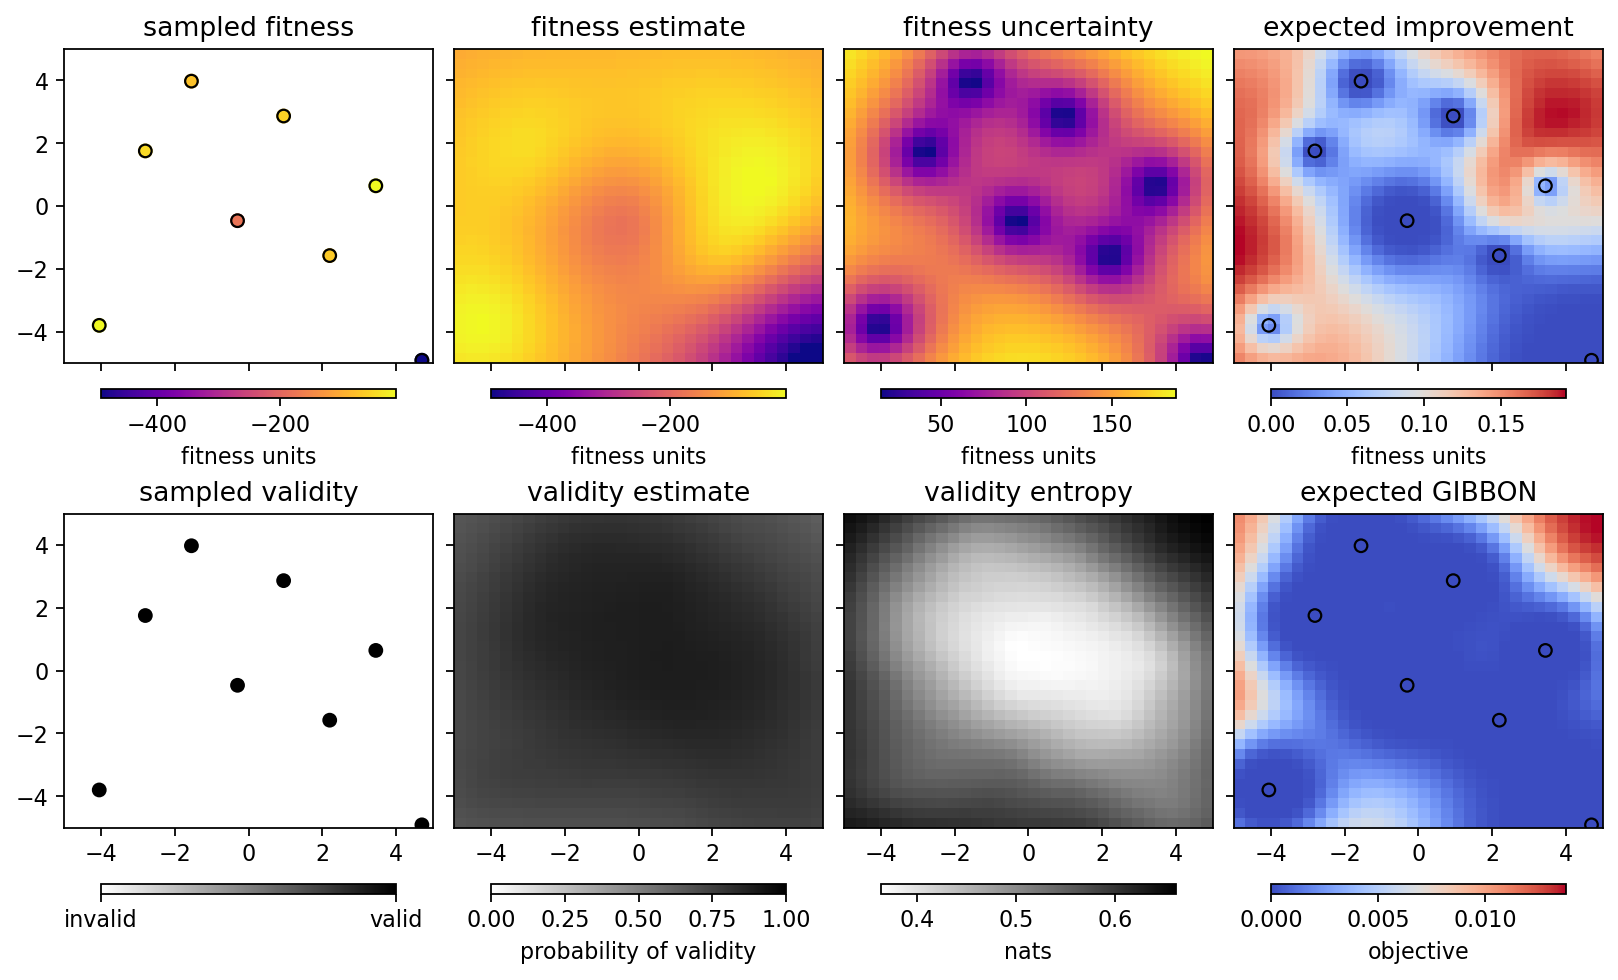

In [3]:
boa.plot_state(gridded=True)

Now let's try the "EI" strategy to sample where we expect the largest improvement in the fitness:

learning with strategy "eI" ...




Transient Scan ID: 2     Time: 2023-04-25 16:11:20
Persistent Unique Scan ID: '6496a504-a175-4877-aef9-004ddcfad7aa'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:20.3 |      2.735 |     -0.092 |
|         2 | 16:11:20.3 |      3.653 |      2.444 |
|         3 | 16:11:20.3 |     -4.995 |     -1.265 |
|         4 | 16:11:20.3 |     -4.054 |     -4.951 |
+-----------+------------+------------+------------+
generator list_scan ['6496a504'] (scan num: 2)





          x1        x2     fitness
8   2.735313 -0.091805  -31.146907
9   3.652677  2.443963  -29.799860
10 -4.995226 -1.265220 -269.006146
11 -4.053764 -4.951329 -181.454592


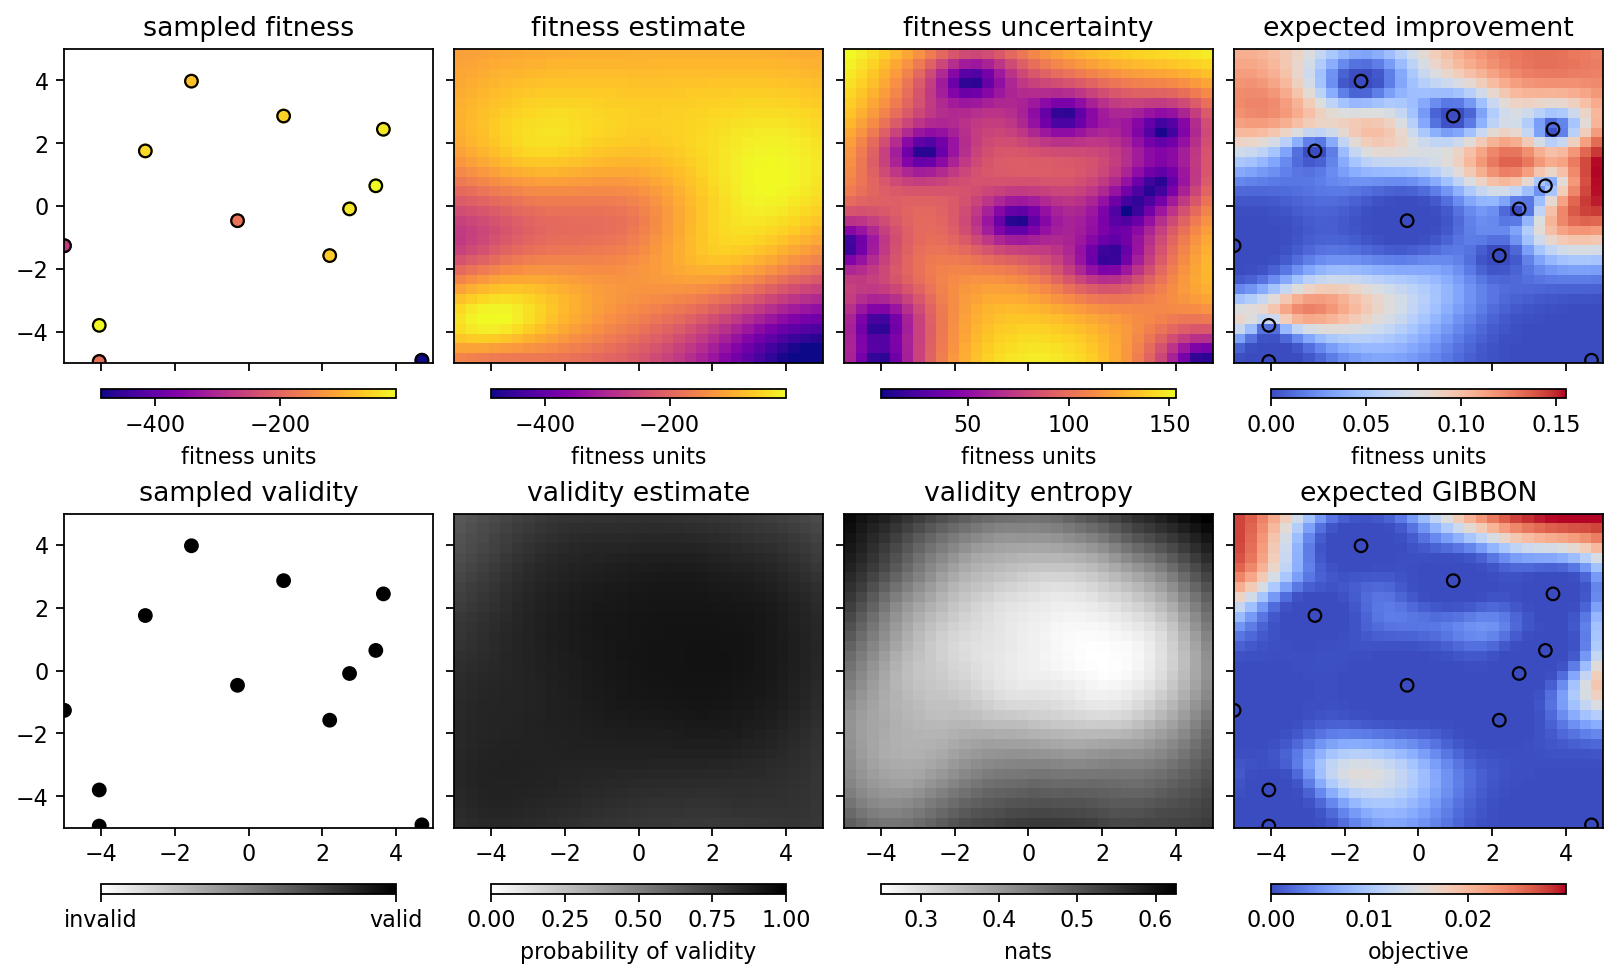

In [4]:
RE(boa.learn(strategy='eI', n_iter=1, n_per_iter=4))
boa.plot_state(gridded=True)

Let's learn a bit more, using the "GIBBON" framework to investigate points that are likely to tell us about the optimum. Running two iterations with four points per iteration:

learning with strategy "eGIBBON" ...




Transient Scan ID: 3     Time: 2023-04-25 16:11:29
Persistent Unique Scan ID: '61654a82-e65a-443a-9ef5-cac4fc532f4e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:29.2 |     -2.477 |     -3.084 |
|         2 | 16:11:29.2 |     -4.898 |      4.990 |
|         3 | 16:11:29.2 |      2.277 |      1.443 |
|         4 | 16:11:29.2 |      4.979 |      4.933 |
+-----------+------------+------------+------------+
generator list_scan ['61654a82'] (scan num: 3)





          x1        x2     fitness
12 -2.476743 -3.084355  -63.205431
13 -4.898269  4.990046 -492.450842
14  2.276797  1.443405  -26.089754
15  4.979047  4.932903 -848.432491




Transient Scan ID: 4     Time: 2023-04-25 16:11:33
Persistent Unique Scan ID: '6b8461f6-d299-4100-9188-09a4f0936955'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:33.3 |      4.885 |     -0.973 |
|         2 | 16:11:33.3 |      0.162 |     -4.730 |
|         3 | 16:11:33.3 |     -0.958 |      2.067 |
|         4 | 16:11:33.3 |      0.962 |      4.914 |
+-----------+------------+------------+------------+
generator list_scan ['6b8461f6'] (scan num: 4)





          x1        x2     fitness
16  4.884585 -0.972673 -142.656193
17  0.162243 -4.729550 -487.799812
18 -0.958203  2.067109  -77.817176
19  0.961802  4.914376 -354.708309




Transient Scan ID: 5     Time: 2023-04-25 16:11:37
Persistent Unique Scan ID: 'dbfe70ee-ea61-4ecd-9009-24ff92aa5462'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:37.4 |      3.390 |      1.661 |
|         2 | 16:11:37.4 |      4.943 |      1.049 |
|         3 | 16:11:37.4 |     -2.551 |     -0.320 |
|         4 | 16:11:37.4 |     -3.535 |     -3.023 |
+-----------+------------+------------+------------+
generator list_scan ['dbfe70ee'] (scan num: 5)





          x1        x2     fitness
20  3.389681  1.661400   -5.350870
21  4.942633  1.048807 -210.541569
22 -2.550959 -0.320230 -112.435906
23 -3.535053 -3.022870   -4.281971




Transient Scan ID: 6     Time: 2023-04-25 16:11:41
Persistent Unique Scan ID: '1735d69b-8b1e-47ab-88b4-5b92d836066a'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:41.6 |     -4.194 |     -3.172 |
|         2 | 16:11:41.6 |     -4.866 |      1.523 |
|         3 | 16:11:41.6 |      0.746 |      1.025 |
|         4 | 16:11:41.6 |      2.530 |      2.483 |
+-----------+------------+------------+------------+
generator list_scan ['1735d69b'] (scan num: 6)





          x1        x2     fitness
24 -4.194292 -3.171518  -12.990276
25 -4.866394  1.523105 -292.915446
26  0.746386  1.024931 -115.770853
27  2.529981  2.483156   -7.354189


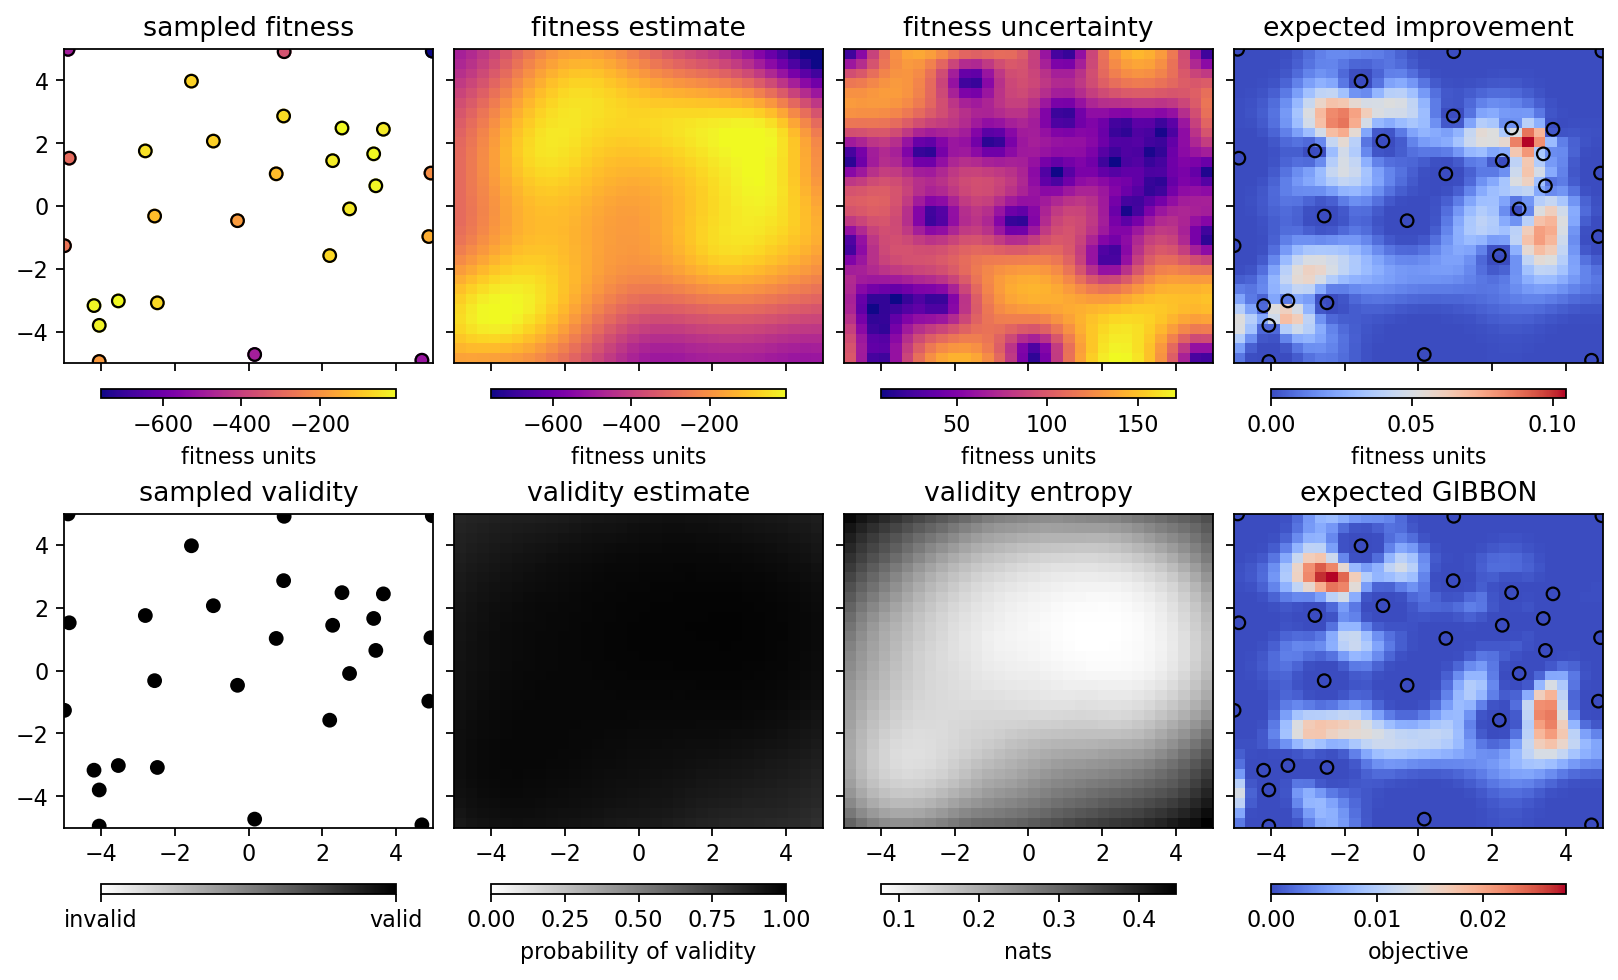

In [5]:
RE(boa.learn(strategy='eGIBBON', n_iter=4, n_per_iter=4))
boa.plot_state(gridded=True)

Eventually, we reach a point of saturation where no more improvement takes place:

learning with strategy "eGIBBON" ...




Transient Scan ID: 7     Time: 2023-04-25 16:11:50
Persistent Unique Scan ID: 'fd524b60-06aa-45eb-aae0-9da236aa4f89'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:50.1 |     -2.418 |      2.903 |
|         2 | 16:11:50.1 |     -2.062 |      1.095 |
|         3 | 16:11:50.1 |     -2.880 |     -1.830 |
|         4 | 16:11:50.1 |      3.306 |     -1.074 |
+-----------+------------+------------+------------+
generator list_scan ['fd524b60'] (scan num: 7)





          x1        x2    fitness
28 -2.418454  2.902904  -6.037571
29 -2.061827  1.094608 -93.807832
30 -2.880496 -1.830177 -63.200619
31  3.305882 -1.073727  -7.768571




Transient Scan ID: 8     Time: 2023-04-25 16:11:54
Persistent Unique Scan ID: 'bdc41bb6-bc51-4fde-a81a-908ba8c407ce'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:54.4 |      3.610 |     -0.265 |
|         2 | 16:11:54.4 |      3.626 |     -2.291 |
|         3 | 16:11:54.4 |     -4.870 |     -3.708 |
|         4 | 16:11:54.4 |     -1.499 |      2.885 |
+-----------+------------+------------+------------+
generator list_scan ['bdc41bb6'] (scan num: 8)





          x1        x2    fitness
32  3.610421 -0.265374 -14.148867
33  3.625833 -2.290970  -3.534109
34 -4.870232 -3.707501 -84.726887
35 -1.499192  2.884520 -34.464255




Transient Scan ID: 9     Time: 2023-04-25 16:11:58
Persistent Unique Scan ID: '0f7cc0ea-be1d-4235-aeca-2de48a5636e3'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:11:58.9 |      1.676 |      2.061 |
|         2 | 16:11:58.9 |     -1.088 |     -2.082 |
|         3 | 16:11:58.9 |      3.114 |     -1.878 |
|         4 | 16:11:58.9 |      4.766 |     -2.409 |
+-----------+------------+------------+------------+
generator list_scan ['0f7cc0ea'] (scan num: 9)





          x1        x2     fitness
36  1.675954  2.060586  -38.746310
37 -1.087697 -2.082400 -155.666018
38  3.113979 -1.877523  -10.246851
39  4.766051 -2.409233  -99.349916




Transient Scan ID: 10     Time: 2023-04-25 16:12:03
Persistent Unique Scan ID: '894923df-424b-49d0-b09e-30dfe5e35e59'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:12:03.2 |      2.594 |     -3.032 |
|         2 | 16:12:03.2 |      3.853 |     -1.390 |
|         3 | 16:12:03.2 |      2.973 |      2.026 |
|         4 | 16:12:03.3 |     -3.813 |     -3.434 |
+-----------+------------+------------+------------+
generator list_scan ['894923df'] (scan num: 10)





          x1        x2    fitness
40  2.593578 -3.031558 -76.247620
41  3.853112 -1.390252  -7.507018
42  2.972529  2.026070  -0.025049
43 -3.812510 -3.434251  -0.973678




Transient Scan ID: 11     Time: 2023-04-25 16:12:07
Persistent Unique Scan ID: 'c43f56ee-bf1f-49e1-830c-5835e28a1b00'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:12:07.6 |     -2.334 |      2.449 |
|         2 | 16:12:07.6 |     -2.436 |      4.965 |
|         3 | 16:12:07.6 |     -0.300 |      3.034 |
|         4 | 16:12:07.6 |      3.108 |      0.955 |
+-----------+------------+------------+------------+
generator list_scan ['c43f56ee'] (scan num: 11)





          x1        x2     fitness
44 -2.333662  2.449057  -20.768246
45 -2.435525  4.965092 -231.556118
46 -0.299740  3.034148  -65.665525
47  3.108165  0.954682   -9.030827




Transient Scan ID: 12     Time: 2023-04-25 16:12:12
Persistent Unique Scan ID: 'bfff0859-f870-4e47-9059-fdd98ec57489'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:12:12.2 |      3.660 |     -1.907 |
|         2 | 16:12:12.2 |      3.019 |      1.520 |
|         3 | 16:12:12.2 |      2.930 |      2.322 |
|         4 | 16:12:12.2 |     -3.161 |      3.029 |
+-----------+------------+------------+------------+
generator list_scan ['bfff0859'] (scan num: 12)





          x1        x2   fitness
48  3.660181 -1.906528 -0.327535
49  3.018923  1.519826 -2.927089
50  2.929979  2.322157 -1.757377
51 -3.160502  3.028555 -5.046450




Transient Scan ID: 13     Time: 2023-04-25 16:12:16
Persistent Unique Scan ID: '21adcbb4-9611-4583-a6aa-84971ed4da56'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:12:16.7 |     -3.015 |      2.675 |
|         2 | 16:12:16.7 |     -2.561 |      3.262 |
|         3 | 16:12:16.7 |      3.363 |      2.182 |
|         4 | 16:12:16.7 |      1.020 |     -2.253 |
+-----------+------------+------------+------------+
generator list_scan ['21adcbb4'] (scan num: 13)





          x1        x2     fitness
52 -3.015087  2.674828   -8.767886
53 -2.561281  3.262250   -2.555269
54  3.363221  2.182306   -7.485009
55  1.020304 -2.253072 -149.950281




Transient Scan ID: 14     Time: 2023-04-25 16:12:21
Persistent Unique Scan ID: '9748839f-ac40-42d6-b796-39e82ded8ba9'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 16:12:21.2 |      3.168 |     -2.386 |
|         2 | 16:12:21.2 |      2.557 |      2.153 |
|         3 | 16:12:21.2 |     -2.908 |      3.185 |
|         4 | 16:12:21.2 |     -3.106 |     -3.900 |
+-----------+------------+------------+------------+
generator list_scan ['9748839f'] (scan num: 14)





          x1        x2    fitness
56  3.168238 -2.386123 -14.678108
57  2.557340  2.153380  -5.358336
58 -2.907992  3.184630  -0.465644
59 -3.106315 -3.899518 -53.575164


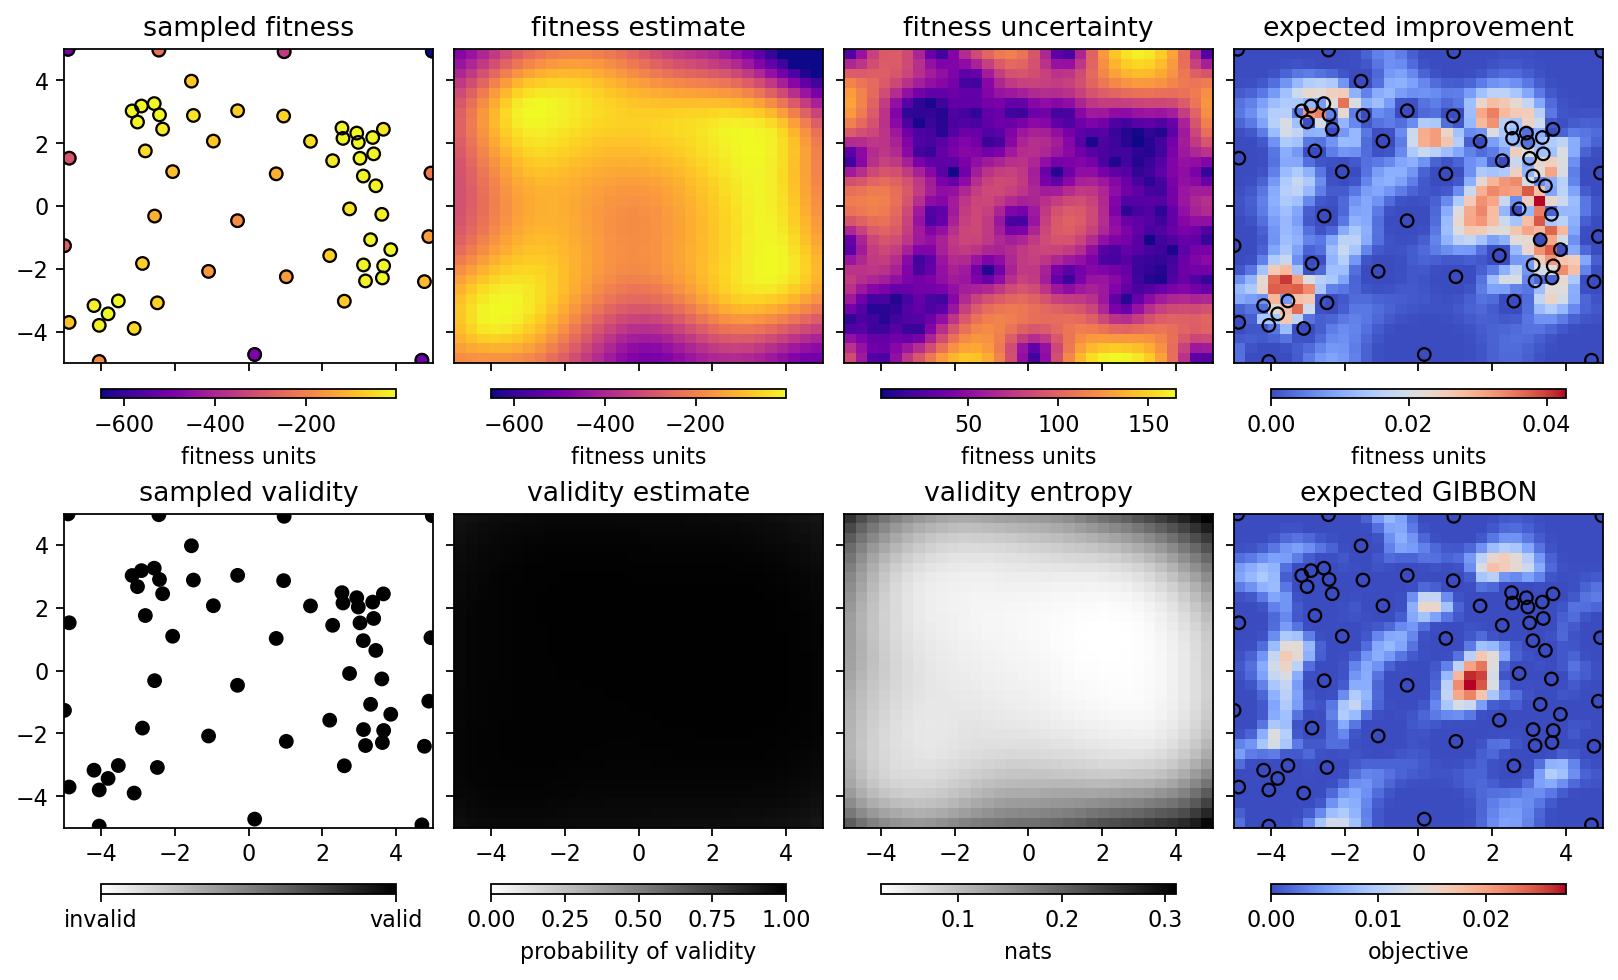

In [6]:
RE(boa.learn(strategy='eGIBBON', n_iter=8, n_per_iter=4))
boa.plot_state(gridded=True)